# **Title: Predictive Maintenance for Wind Turbines using Machine Learning**

## **Dataset Description**
“**ReneWind**” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has **40 predictors**
The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable

## **Objective**
The objective is to build various classification models, tune them, and find the best one that will help **identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost**. The nature of predictions made by the classification model will translate as follows:
- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.
It is given that the **cost of repairing a generator is much less than the cost of replacing it**, and the **cost of inspection is less than the cost of repair**.

**“1” in the target variables should be considered as “failure” and “0” represents “No failure”.**

## **Importing libraries and Loading the dataset**

In [3]:
#libraries for data manipulation
import numpy as np
import pandas as pd

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#to remove warning
import warnings
warnings.filterwarnings('ignore')

#to impute na
from sklearn.impute import SimpleImputer
# scaling
from sklearn.preprocessing import StandardScaler
#libraries for model building
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# for creating a pipeline
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [4]:
df_train = pd.read_csv("Data\\Train.csv")
df_test = pd.read_csv("Data\\Test.csv")

## **Data Overview**

#### **Training data and Testing Data**

In [5]:
df_train.shape, df_test.shape

((20000, 41), (5000, 41))

In [6]:
df_train.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
9877,-5.608316,-4.745615,-0.687612,3.101082,-1.830743,-2.688992,-1.144688,0.355688,-2.411505,4.396913,-4.942685,5.126844,-0.936446,0.710466,-2.011093,-3.705401,3.198073,1.840092,8.017643,6.535620,-1.358658,2.687128,2.079327,5.444198,-0.139998,-6.679678,-0.535657,4.818478,-4.855447,-0.238554,-5.540375,1.246268,-5.490037,8.503342,1.622829,3.263439,1.528268,2.693994,3.141939,-6.494965,0
9296,4.526937,0.202973,6.597618,-8.484555,-0.686003,1.485820,1.354251,-3.144086,-2.579511,3.456887,0.766052,2.836576,1.207316,-1.161739,2.362962,-2.178283,-7.406271,1.371312,-0.256208,-7.057526,-3.200871,-0.054837,-5.736791,-2.548348,2.641365,3.348069,9.480320,-3.713255,-1.230806,-4.464440,7.308148,-6.977497,-0.015305,-0.540541,1.091415,8.269955,-0.987626,2.799836,3.489964,3.096176,0
11615,-4.725408,-3.357760,1.409663,1.616323,-0.545253,-2.928706,-1.586487,2.835449,-1.657206,1.516059,-2.856698,3.248420,2.355374,1.226155,-2.866935,1.302427,0.743313,0.188481,2.604025,4.537717,-0.799234,-0.464702,1.090465,1.281287,-0.860840,-1.845774,-2.159879,0.303599,-1.485225,1.244654,0.027806,3.344825,-1.375659,3.189354,1.772249,3.523633,1.016552,-3.596155,1.737619,-3.227587,0
19350,1.174548,3.927802,5.523357,4.868151,-0.920794,-2.587174,-0.282573,-3.052336,2.187959,-0.136899,-4.301214,0.730529,0.366021,-2.907584,-1.620854,-7.670213,2.562338,-1.708544,6.313151,1.826157,-5.988368,0.802320,-4.161388,1.662247,1.483969,4.166775,-0.644885,1.080521,-3.304867,-3.346590,-2.020582,-3.376789,-3.558789,2.999173,3.145086,-1.148896,-1.352070,2.558718,1.104909,-3.975607,0
16933,-0.601829,0.709896,-0.443453,4.734703,-0.867191,-0.813853,-1.859972,-0.832501,2.117375,-1.430519,-0.402958,-1.650771,0.874620,-1.125948,-3.921639,-4.126690,2.000970,-0.117578,2.719555,2.243289,-4.116871,1.587809,1.039316,2.476148,-1.597604,0.593366,-4.668299,0.921337,0.809868,3.805240,-3.931659,3.682987,2.361378,-0.806177,4.474514,-5.137001,-0.916746,-0.427218,-1.805600,-3.648962,0


In [7]:
df_test.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
1970,-6.050729,-5.258888,-1.201657,6.778420,-2.416412,-3.618900,-4.425568,2.987579,1.062517,-0.262717,-2.717338,0.630483,3.698405,1.305398,-7.844651,-2.352555,3.565462,0.789186,4.585229,9.600532,-4.548268,1.723101,3.775963,2.861202,-2.689480,-4.555937,-7.669631,1.866842,0.168173,7.355895,-6.214045,7.923785,1.181625,2.421351,6.492449,-2.739377,0.954764,-6.340011,-0.834461,-7.346303,0
879,-1.223599,-4.945278,1.720356,-3.887440,-2.476417,-0.645582,-1.399646,0.179646,0.370236,0.275493,-1.670596,2.764259,3.631645,1.213266,-2.424092,-1.899071,-0.417759,3.127058,-1.026174,5.157645,-1.915888,0.654551,-1.110631,-5.739009,2.276912,-4.171704,3.723749,-0.861321,-0.787964,-0.612698,-2.552993,-7.371662,-4.085258,2.409680,-1.427848,5.578513,3.521407,-3.872949,3.166634,0.781345,0
2866,8.602974,0.605308,7.200420,-5.058573,-2.403578,-1.473597,0.725827,-1.630413,2.377903,0.890111,-1.417429,0.053000,6.129802,0.834254,-0.247450,-3.827445,-5.819724,-1.446368,-1.382089,-2.371897,-6.942148,1.022040,-4.217114,-7.176415,4.479686,4.388569,9.983262,-4.841142,-4.389641,-6.478953,5.700577,-6.886583,-4.644587,-1.581437,1.594755,5.571456,-1.300872,-4.850817,1.670259,1.094659,0
158,-2.515883,1.377566,1.254526,-2.796679,0.444776,3.867594,-1.185812,-6.409027,1.290085,-0.658135,3.524884,-1.796304,1.985364,-2.633285,-3.783528,-4.504853,-4.481928,3.007017,-1.718639,-3.851405,-1.470789,-1.168601,-4.898373,-3.256838,-1.608706,3.444592,0.862150,-1.882983,3.644397,1.530714,-2.580763,-5.827621,5.801654,-1.554584,-0.821133,-0.020655,0.499192,5.577307,2.694987,0.268278,0
3761,0.120040,3.318706,4.097106,-1.876124,-0.304330,-0.876883,-0.309050,-2.165458,2.701799,-3.879575,-0.575291,3.628885,6.354899,-2.563519,-5.143899,-4.435007,-0.991421,1.366427,-1.152446,-0.179776,-5.489823,0.091269,-1.776318,-5.775820,0.312247,5.933614,0.256652,-3.505117,0.401768,-1.228787,-2.642890,-7.793920,-1.299821,-1.347620,-0.825607,1.256591,2.218211,-0.710006,2.660494,0.930480,0


In [8]:
df_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000000,19982.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.271996,0.440430,2.484699,-0.083152,-0.053752,-0.995443,-0.879325,-0.548195,-0.016808,-0.012998,-1.895393,1.604825,1.580486,-0.950632,-2.414993,-2.925225,-0.134261,1.189347,1.181808,0.023608,-3.611252,0.951835,-0.366116,1.134389,-0.002186,1.873785,-0.612413,-0.883218,-0.985625,-0.015534,0.486842,0.303799,0.049825,-0.462702,2.229620,1.514809,0.011316,-0.344025,0.890653,-0.875630,0.055500
std,3.441625,3.150784,3.388963,3.431595,2.104801,2.040970,1.761626,3.295756,2.160568,2.193201,3.124322,2.930454,2.874658,1.789651,3.354974,4.221717,3.345462,2.592276,3.396925,3.669477,3.567690,1.651547,4.031860,3.912069,2.016740,3.435137,4.368847,1.917713,2.684365,3.005258,3.461384,5.500400,3.575285,3.183841,2.937102,3.800860,1.788165,3.948147,1.753054,3.012155,0.228959
min,-11.876451,-12.319951,-10.708139,-15.082052,-8.603361,-10.227147,-7.949681,-15.657561,-8.596313,-9.853957,-14.832058,-12.948007,-13.228247,-7.738593,-16.416606,-20.374158,-14.091184,-11.643994,-13.491784,-13.922659,-17.956231,-10.122095,-14.866128,-16.387147,-8.228266,-11.834271,-14.904939,-9.269489,-12.579469,-14.796047,-13.722760,-19.876502,-16.898353,-17.985094,-15.349803,-14.833178,-5.478350,-17.375002,-6.438880,-11.023935,0.000000
25%,-2.737146,-1.640674,0.206860,-2.347660,-1.535607,-2.347238,-2.030926,-2.642665,-1.494973,-1.411212,-3.922404,-0.396514,-0.223545,-2.170741,-4.415322,-5.634240,-2.215611,-0.403917,-1.050168,-2.432953,-5.930360,-0.118127,-3.098756,-1.468062,-1.365178,-0.337863,-3.652323,-2.171218,-2.787443,-1.867114,-1.817772,-3.420469,-2.242857,-2.136984,0.336191,-0.943809,-1.255819,-2.987638,-0.272250,-2.940193,0.000000
50%,-0.747917,0.471536,2.255786,-0.135241,-0.101952,-1.000515,-0.917179,-0.389085,-0.067597,0.100973,-1.921237,1.507841,1.637185,-0.957163,-2.382617,-2.682705,-0.014580,0.883398,1.279061,0.033415,-3.532888,0.974687,-0.262093,0.969048,0.025050,1.950531,-0.884894,-0.891073,-1.176181,0.184346,0.490304,0.052073,-0.066249,-0.255008,2.098633,1.566526,-0.128435,-0.316849,0.919261,-0.920806,0.000000
75%,1.840112,2.543967,4.566165,2.130615,1.340480,0.380330,0.223695,1.722965,1.409203,1.477045,0.118906,3.571454,3.459886,0.270677,-0.359052,-0.095046,2.068751,2.571770,3.493299,2.512372,-1.265884,2.025594,2.451750,3.545975,1.397112,4.130037,2.189177,0.375884,0.629773,2.036229,2.730688,3.761722,2.255134,1.436935,4.064358,3.983939,1.175533,2.279399,2.057540,1.119897,0.000000
max,15.493002,13.089269,17.090919,13.236381,8.133797,6.975847,8.006091,11.679495,8.137580,8.108472,11.826433,15.080698,15.419616,5.670664,12.246455,13.583212,16.756432,13.179863,13.237742,16.052339,13.840473,7.409856,14.458734,17.163291,8.223389,16.836410,17.560404,6.527643,10.722055,12.505812,17.255090,23.633187,16.692486,14.358213,15.291065,19.329576,7.467006,15.289923,7.759877,10.654265,1.000000


In [9]:
df_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,4995.000000,4994.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.277622,0.397928,2.551787,-0.048943,-0.080120,-1.042138,-0.907922,-0.574592,0.030121,0.018524,-2.008615,1.576413,1.622456,-0.921097,-2.452174,-3.018503,-0.103721,1.195606,1.210490,0.138429,-3.664398,0.961960,-0.422182,1.088841,0.061235,1.847261,-0.552397,-0.867678,-1.095805,-0.118699,0.468810,0.232567,-0.080115,-0.392663,2.211205,1.594845,0.022931,-0.405659,0.938800,-0.932406,0.056400
std,3.466280,3.139562,3.326607,3.413937,2.110870,2.005444,1.769017,3.331911,2.174139,2.145437,3.112220,2.907401,2.882892,1.803470,3.387041,4.264407,3.336513,2.586403,3.384662,3.657171,3.577841,1.640414,4.056714,3.968207,2.010227,3.400330,4.402947,1.926181,2.655454,3.023292,3.446324,5.585628,3.538624,3.166101,2.948426,3.774970,1.785320,3.968936,1.716502,2.978193,0.230716
min,-12.381696,-10.716179,-9.237940,-14.682446,-7.711569,-8.924196,-8.124230,-12.252731,-6.785495,-8.170956,-13.151753,-8.164048,-11.548209,-7.813929,-15.285768,-20.985779,-13.418281,-12.214016,-14.169635,-13.719620,-16.340707,-6.740239,-14.422274,-12.315545,-6.770139,-11.414019,-13.177038,-7.933388,-9.987800,-12.438434,-11.263271,-17.244168,-14.903781,-14.699725,-12.260591,-12.735567,-5.079070,-15.334533,-5.451050,-10.076234,0.000000
25%,-2.743691,-1.649211,0.314931,-2.292694,-1.615238,-2.368853,-2.054259,-2.642088,-1.455712,-1.353320,-4.050432,-0.449674,-0.126012,-2.110952,-4.479072,-5.648343,-2.227683,-0.408850,-1.026394,-2.325454,-5.944369,-0.047728,-3.162690,-1.623203,-1.298377,-0.242470,-3.662591,-2.159811,-2.861373,-1.996743,-1.822421,-3.556267,-2.348121,-2.009604,0.321818,-0.866066,-1.240526,-2.984480,-0.208024,-2.986587,0.000000
50%,-0.764767,0.427369,2.260428,-0.145753,-0.131890,-1.048571,-0.939695,-0.357943,-0.079891,0.166292,-2.043122,1.488253,1.718649,-0.896011,-2.417131,-2.773763,0.047462,0.881395,1.295864,0.193386,-3.662870,0.986020,-0.279222,0.912815,0.076703,1.917032,-0.871982,-0.930695,-1.340547,0.112463,0.485742,-0.076694,-0.159713,-0.171745,2.111750,1.702964,-0.110415,-0.381162,0.959152,-1.002764,0.000000
75%,1.831313,2.444486,4.587000,2.166468,1.341197,0.307555,0.212228,1.712896,1.449548,1.511248,0.044069,3.562626,3.464604,0.272324,-0.432943,-0.178105,2.111907,2.604014,3.526278,2.539550,-1.329645,2.029321,2.425911,3.537195,1.428491,4.156106,2.247257,0.420587,0.521843,1.946450,2.779008,3.751857,2.099160,1.465402,4.031639,4.104409,1.237522,2.287998,2.130769,1.079738,0.000000
max,13.504352,14.079073,15.314503,12.140157,7.672835,5.067685,7.616182,10.414722,8.850720,6.598728,9.956400,12.983644,12.620041,5.734112,11.673420,13.975843,19.776592,13.642235,12.427997,13.870565,11.046925,7.505291,13.180887,17.806035,6.556937,17.528193,17.290161,7.415659,14.039466,10.314976,12.558928,26.539391,13.323517,12.146302,13.489237,17.116122,6.809938,13.064950,7.182237,8.698460,1.000000


In [10]:
#Checking for duplicates
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [11]:
# Checking for missing values
df_train.isna().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [12]:
df_test.isna().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

### **Main points:**
- Training data has **20000 rows** while testing data has **5000 rows**
- Both training and testing datasets have **41 cols**
- There are **NO duplicates** in both
- There are **missing values in cols V1 and V2** of both datasets, so we'll handle them
- All the **cols are numerical**


## **Exploratory Data Analysis**

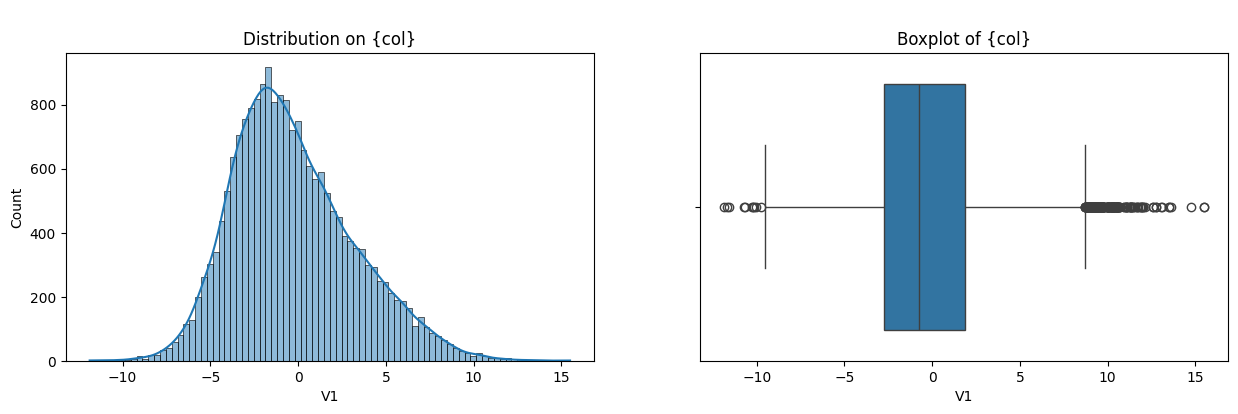

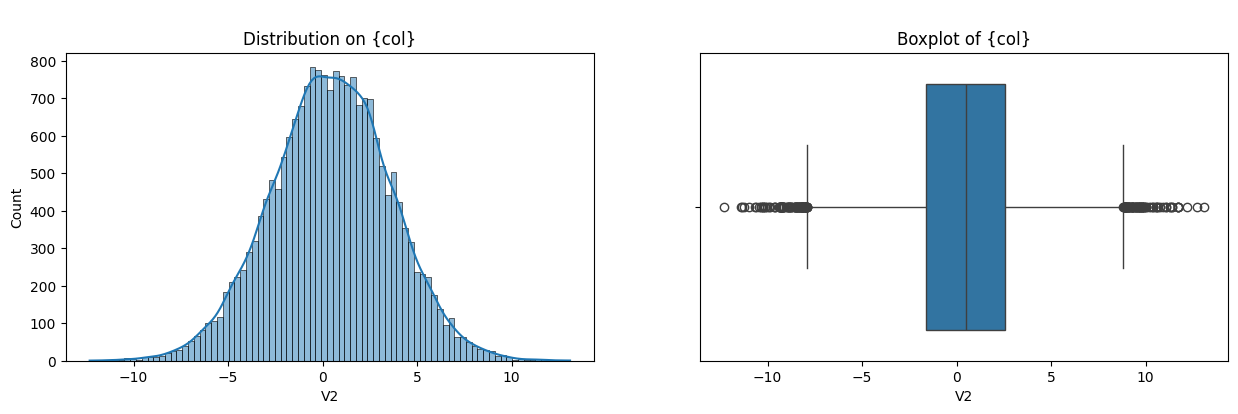

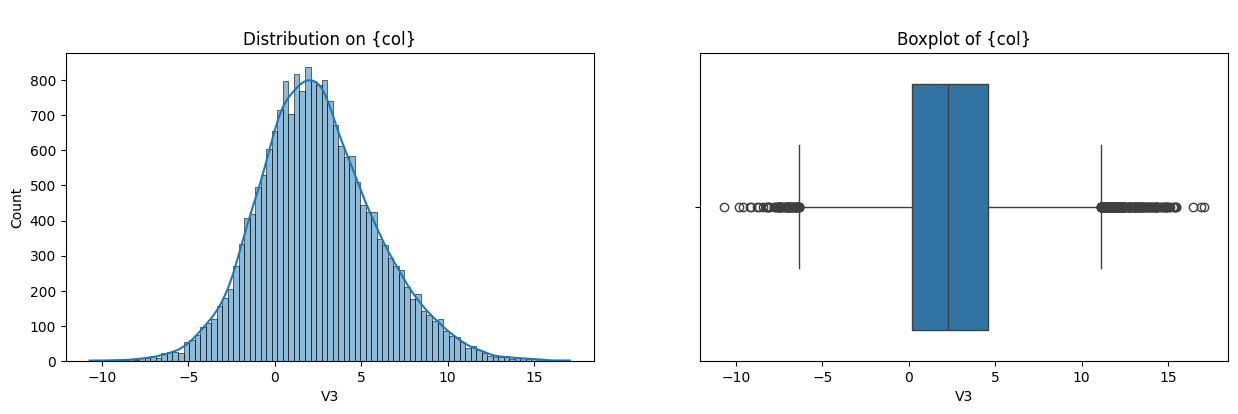

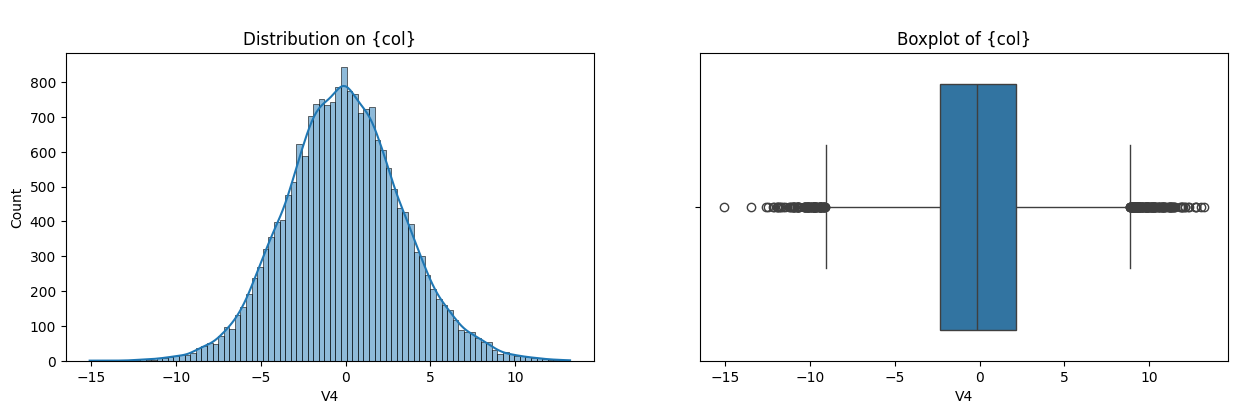

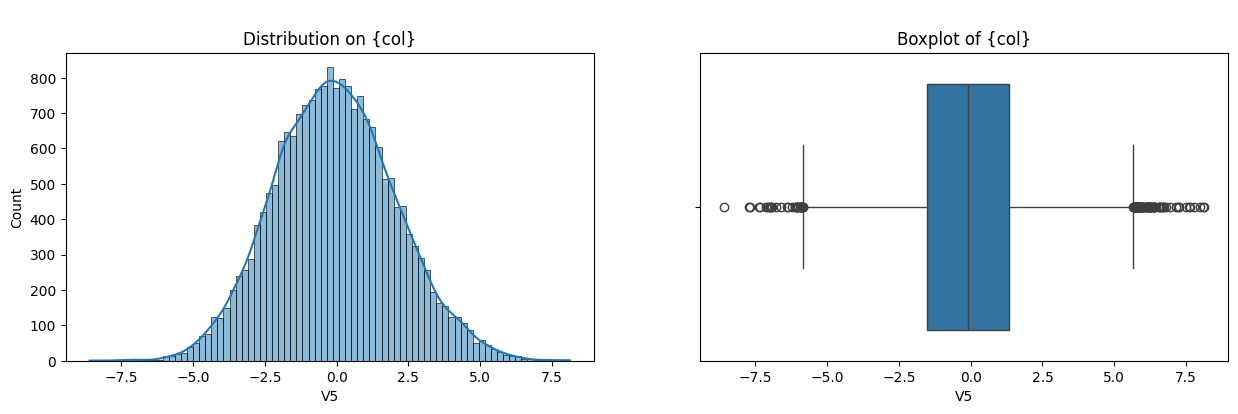

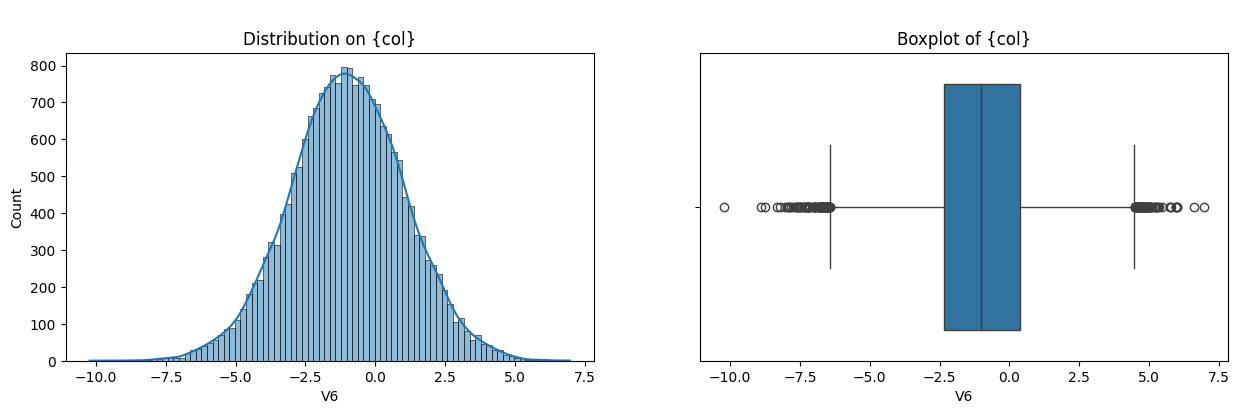

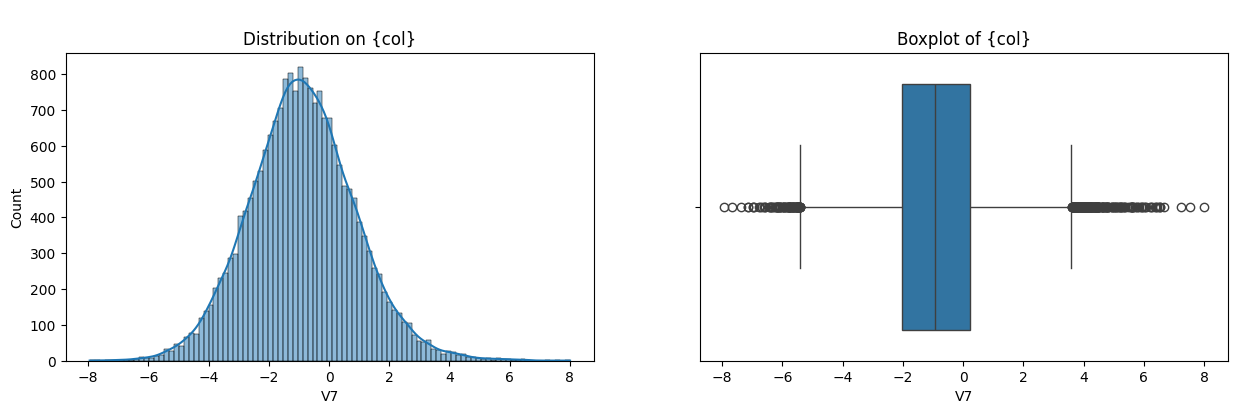

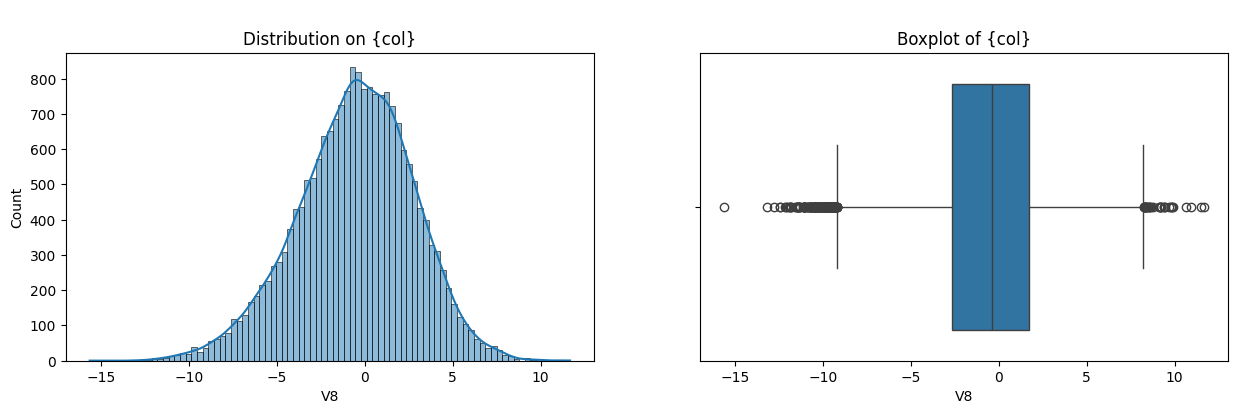

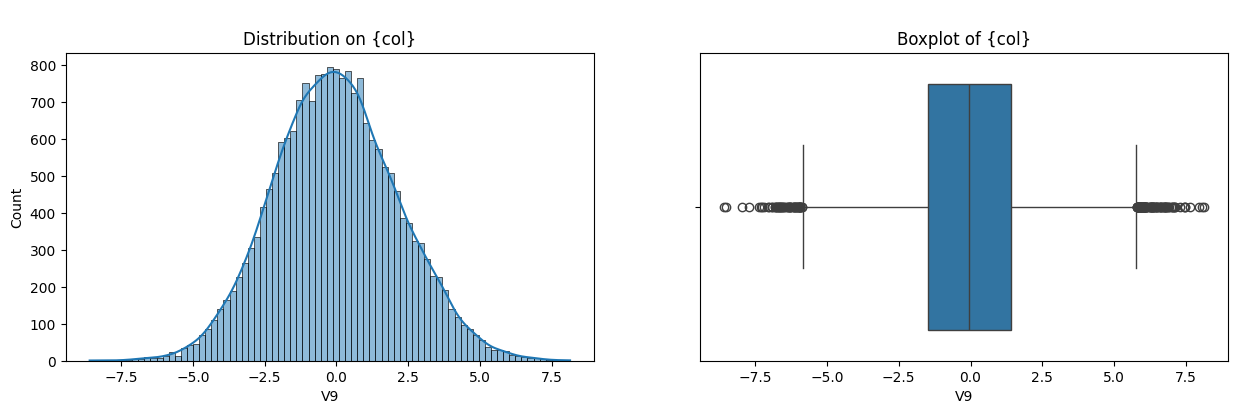

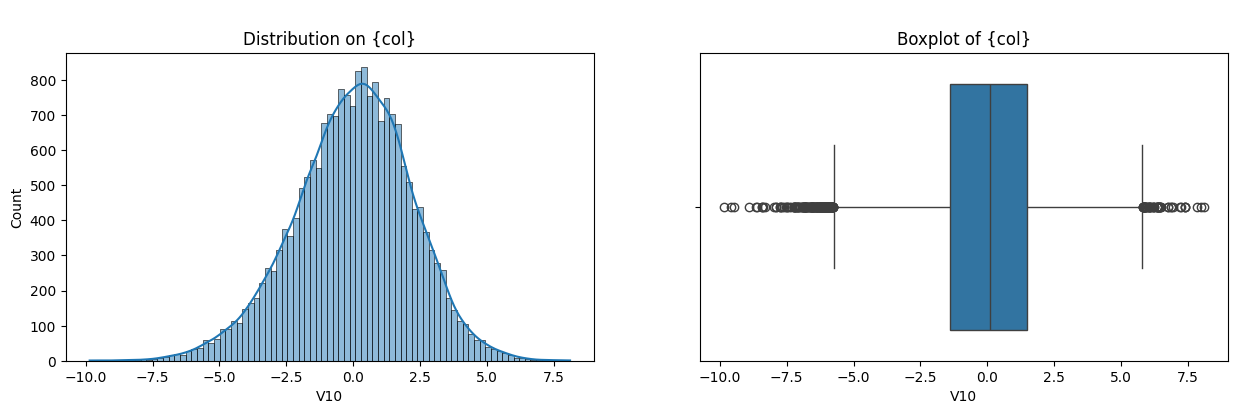

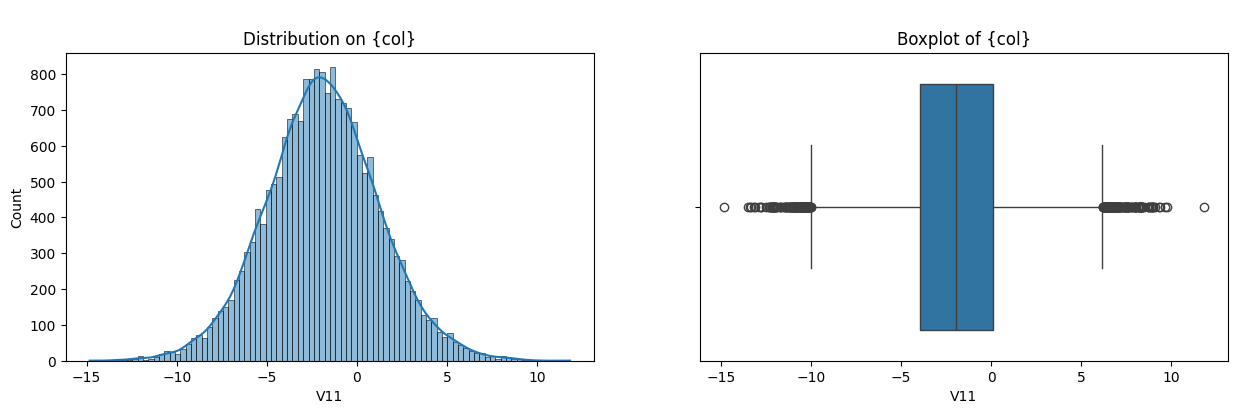

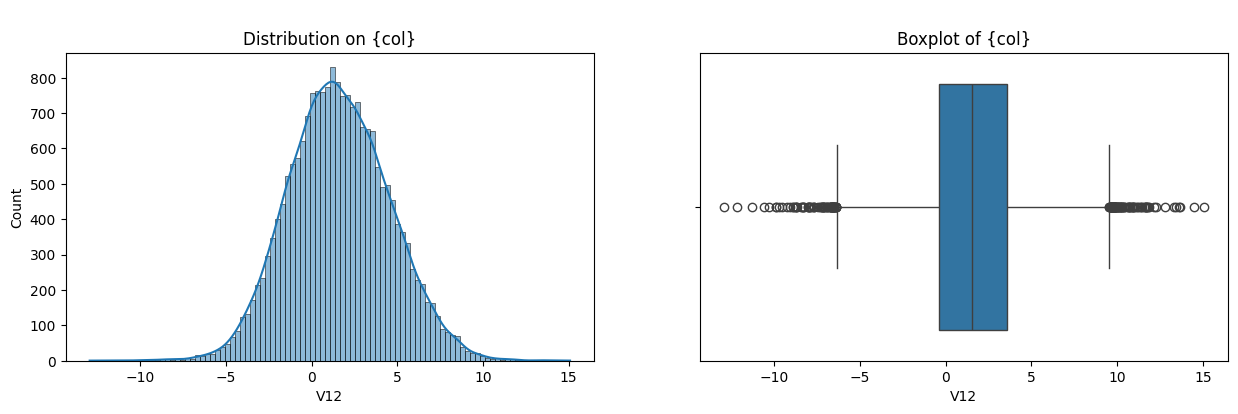

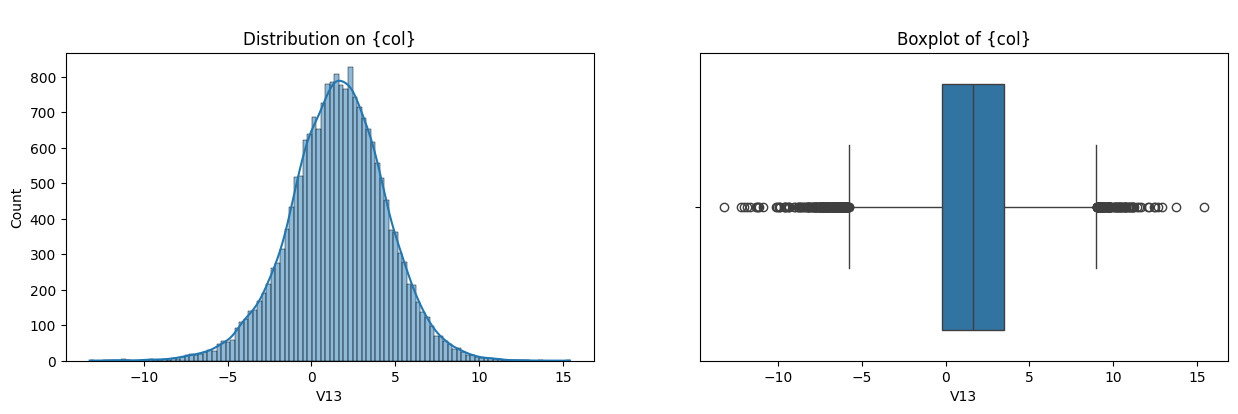

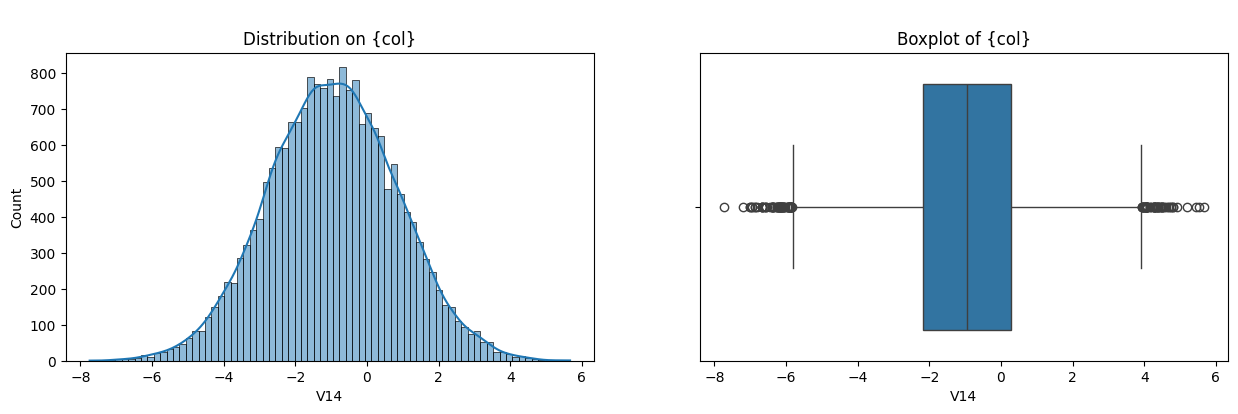

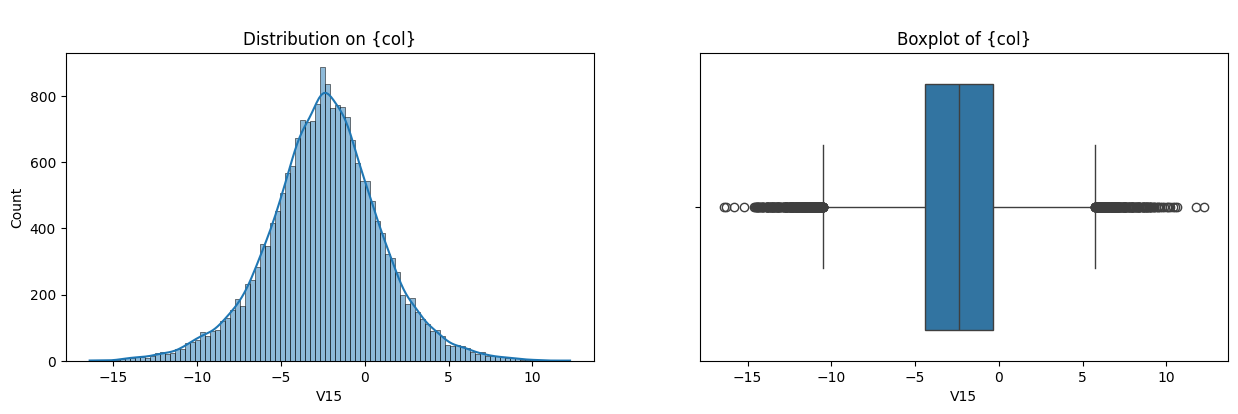

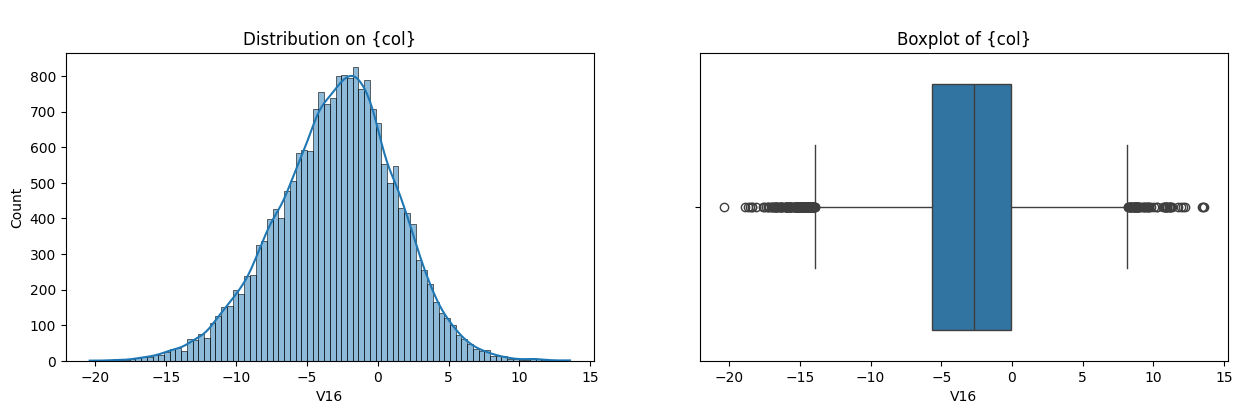

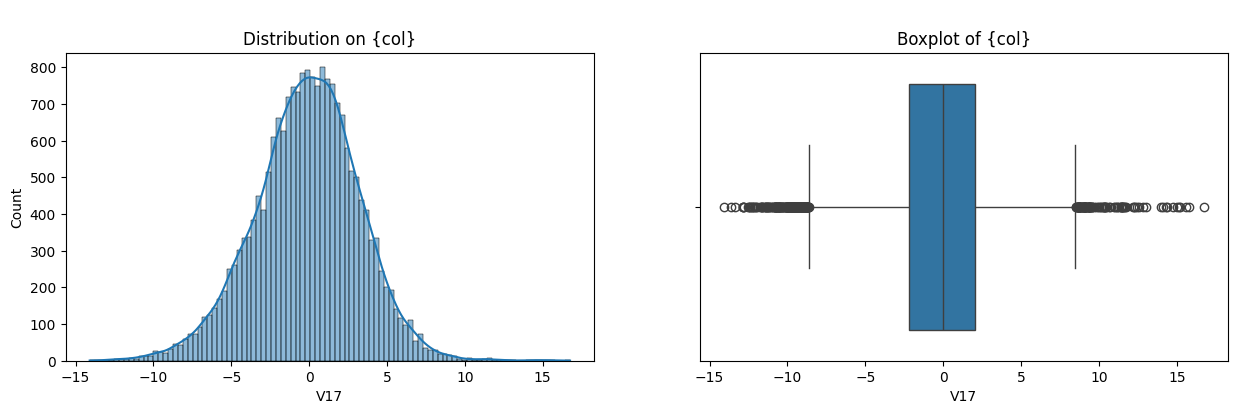

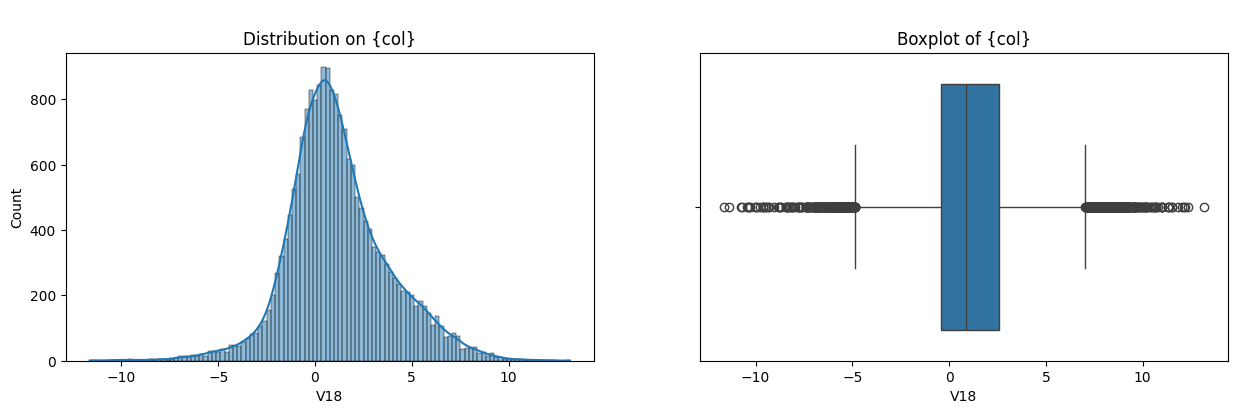

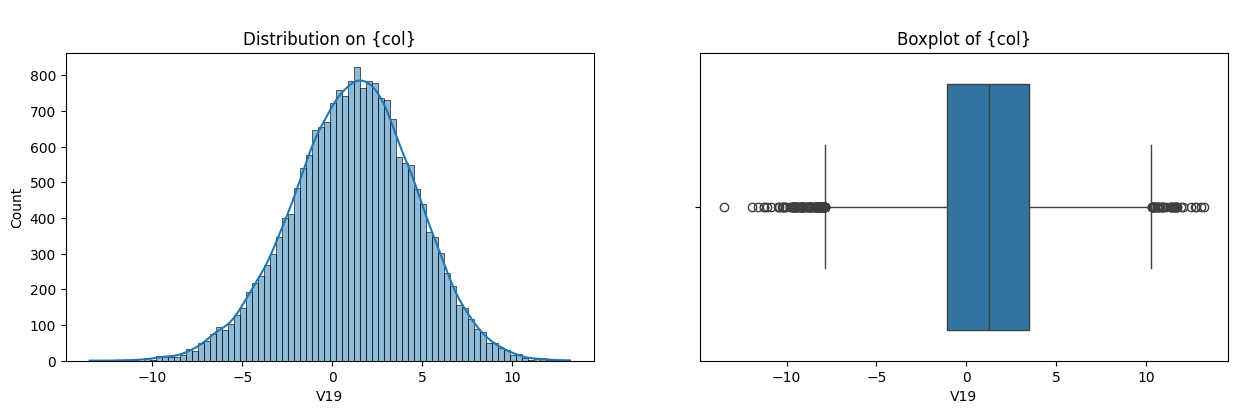

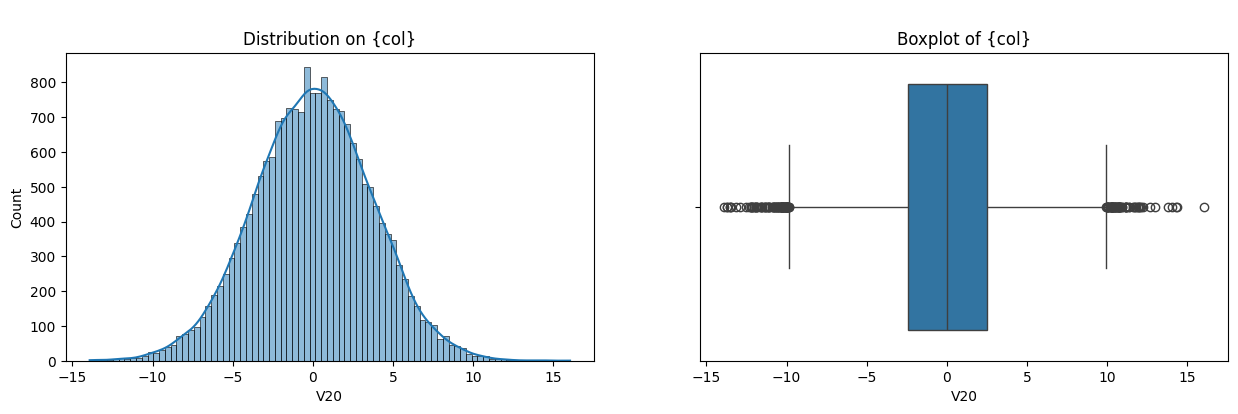

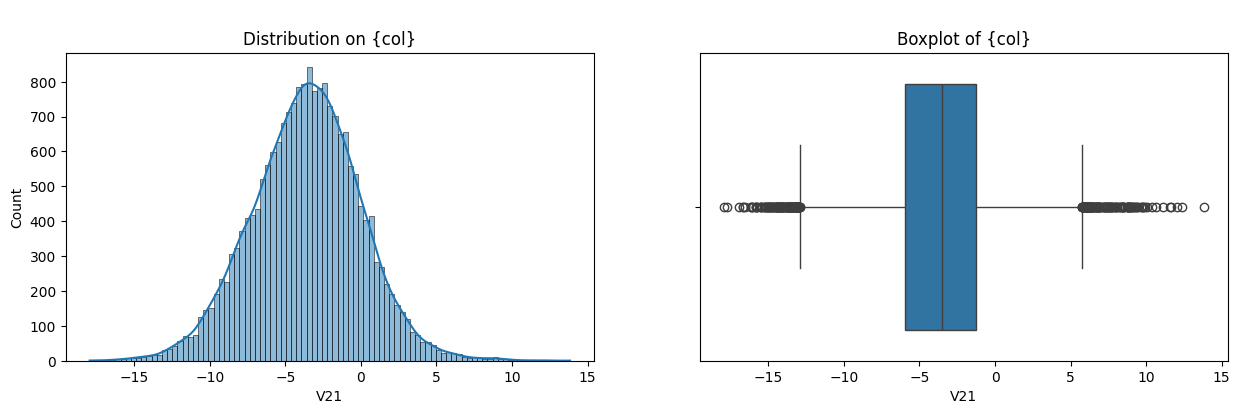

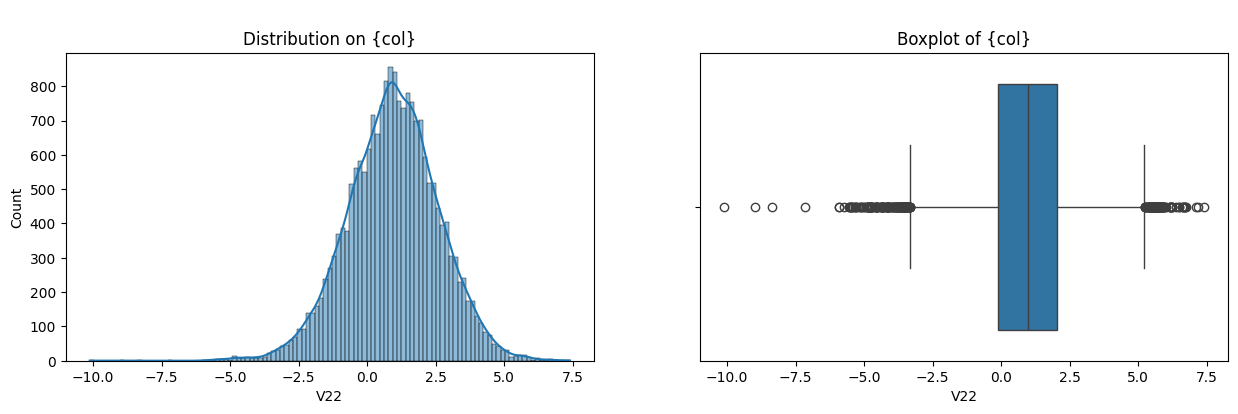

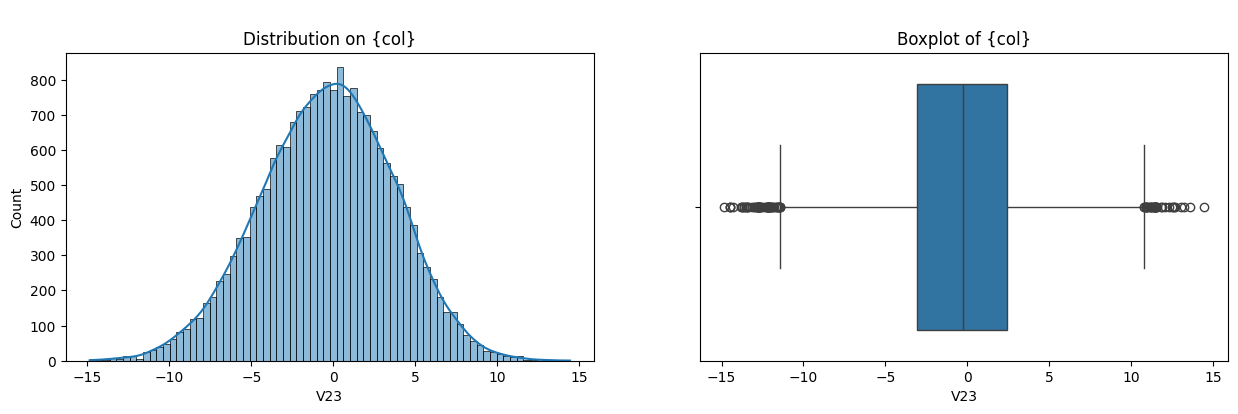

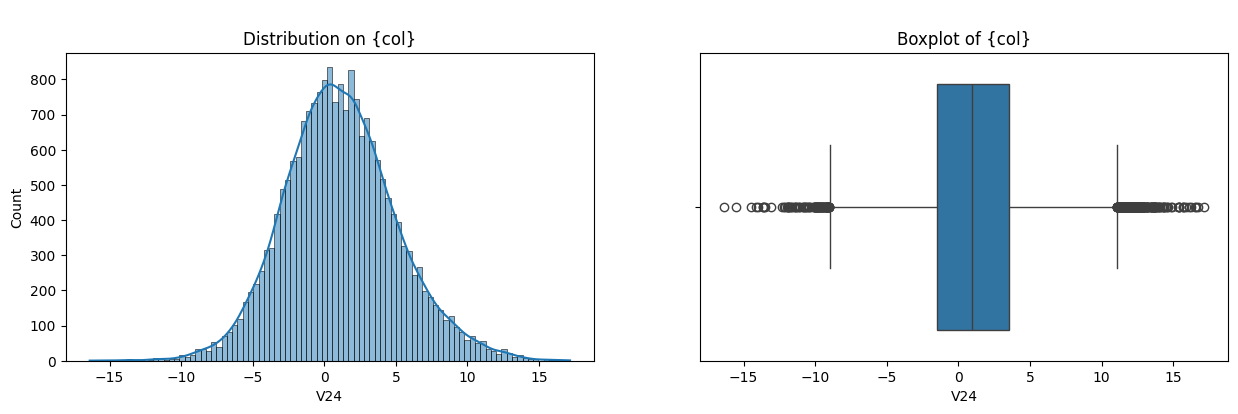

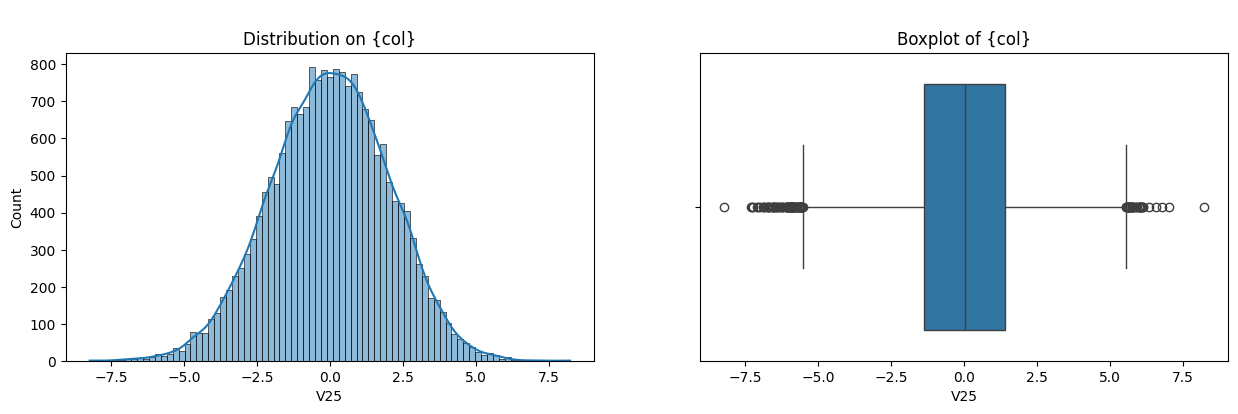

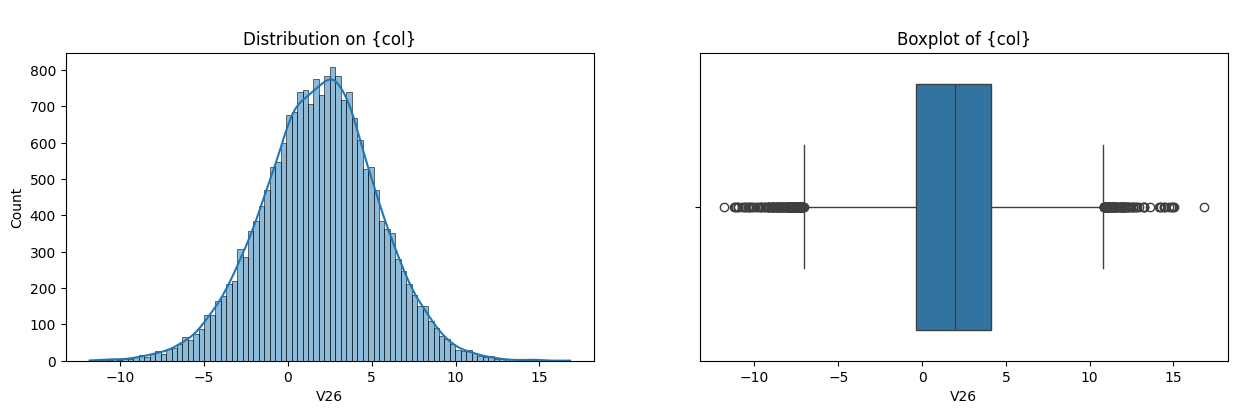

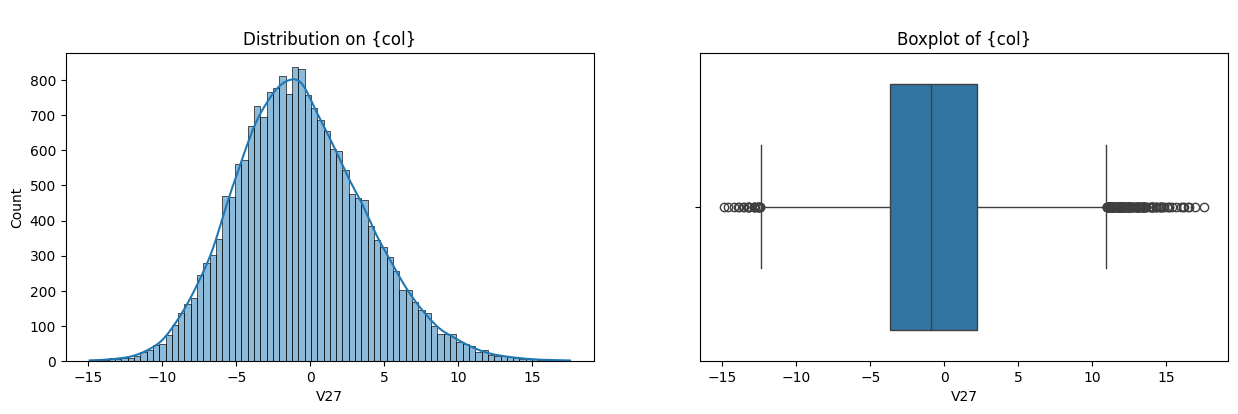

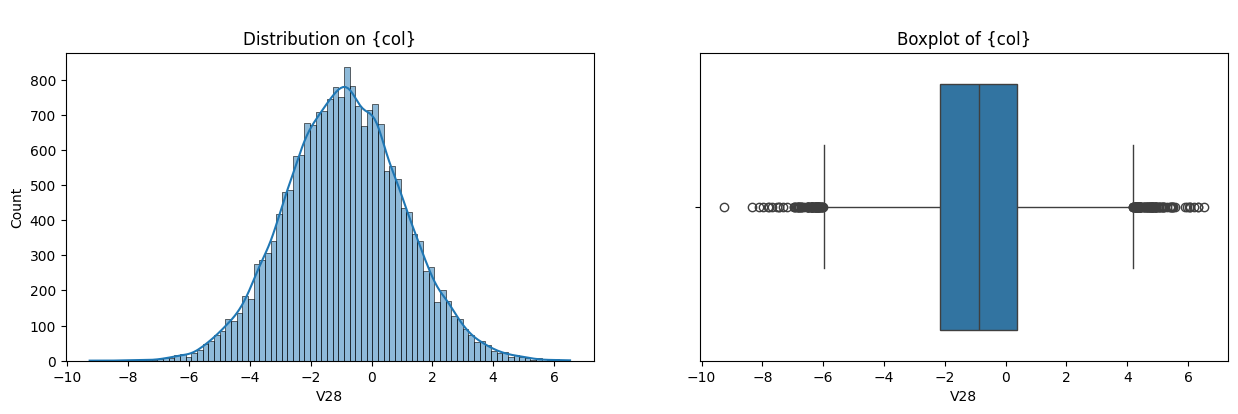

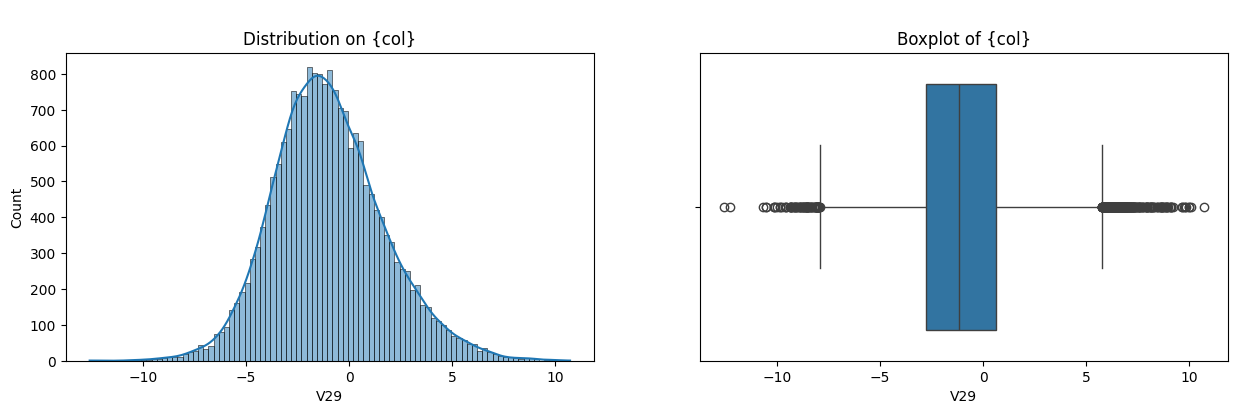

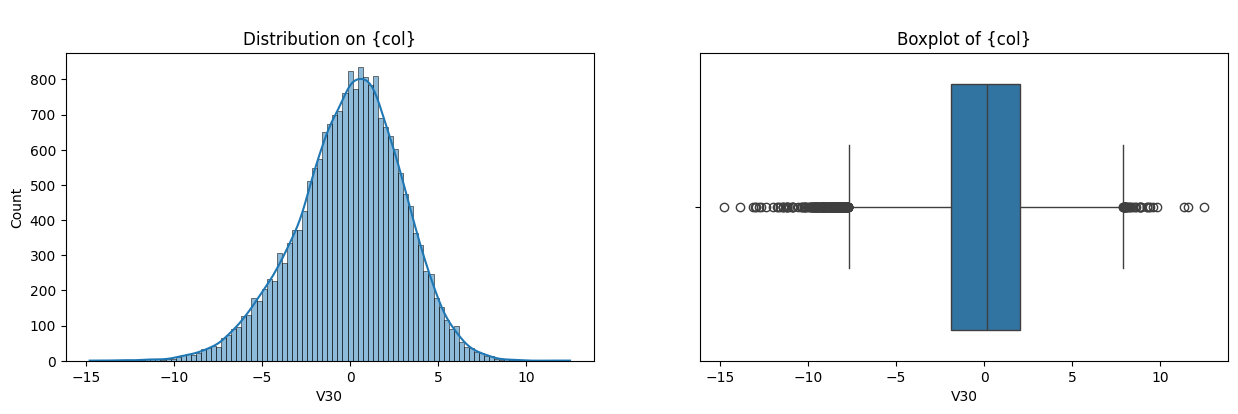

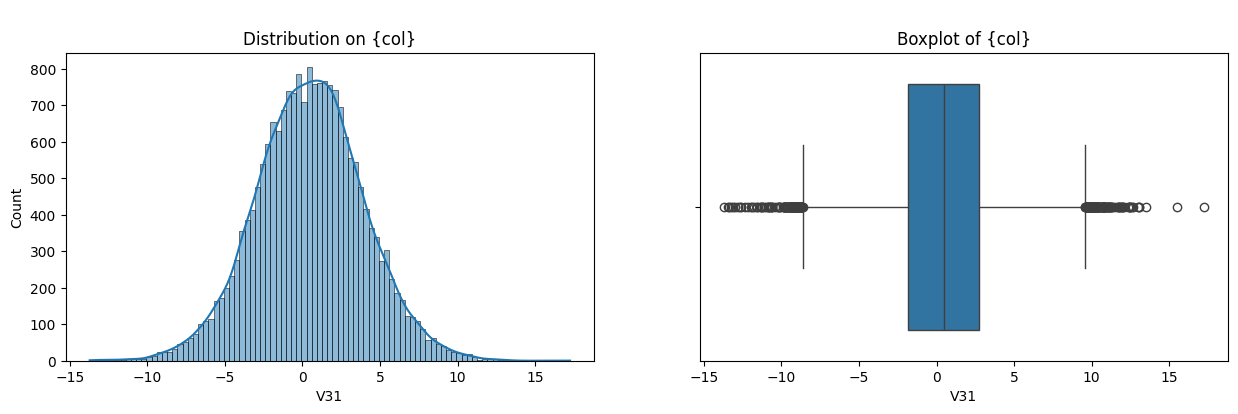

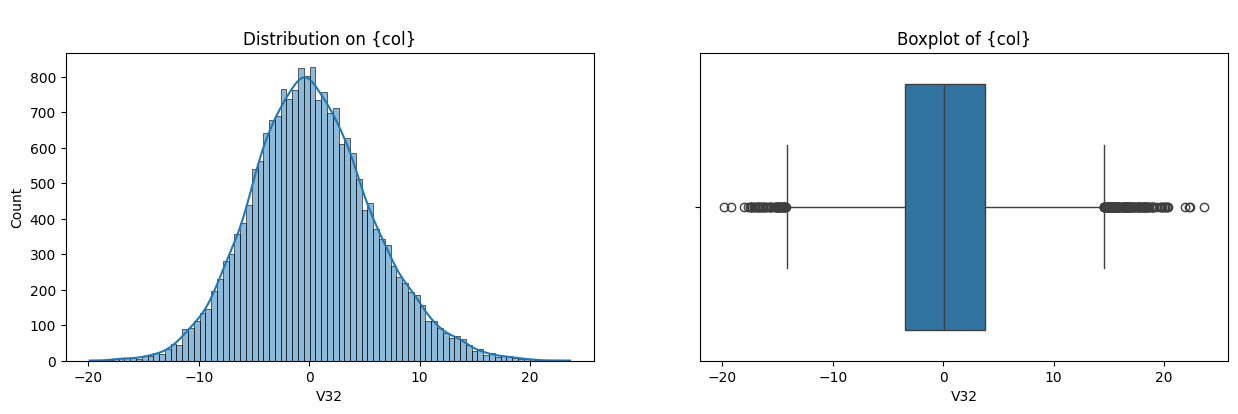

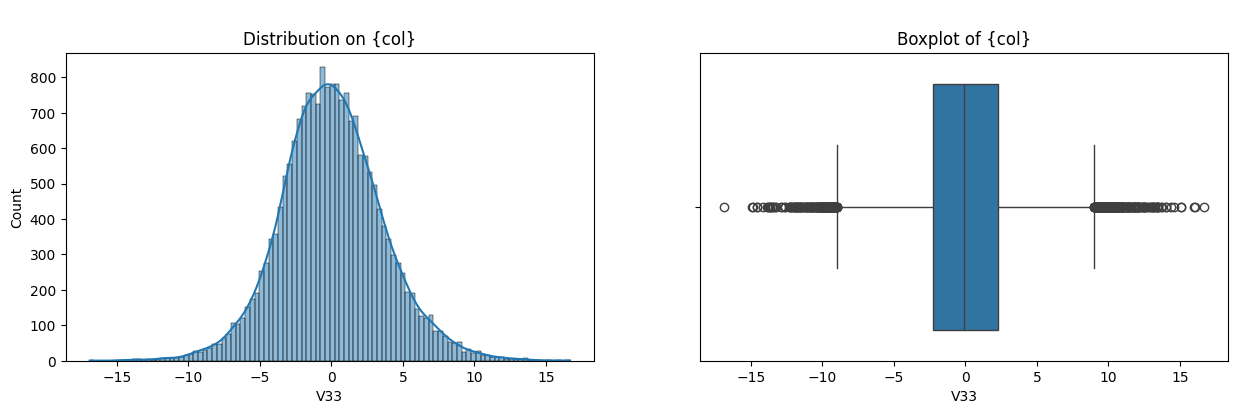

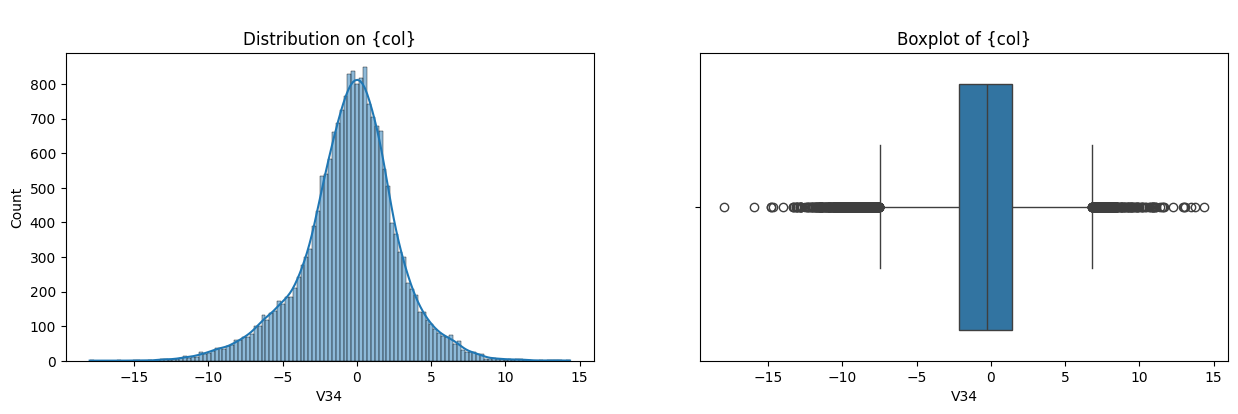

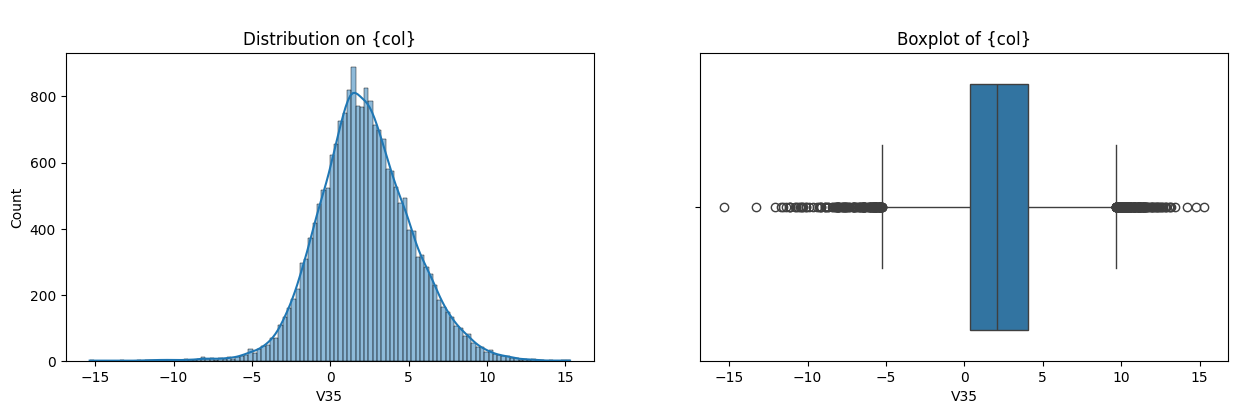

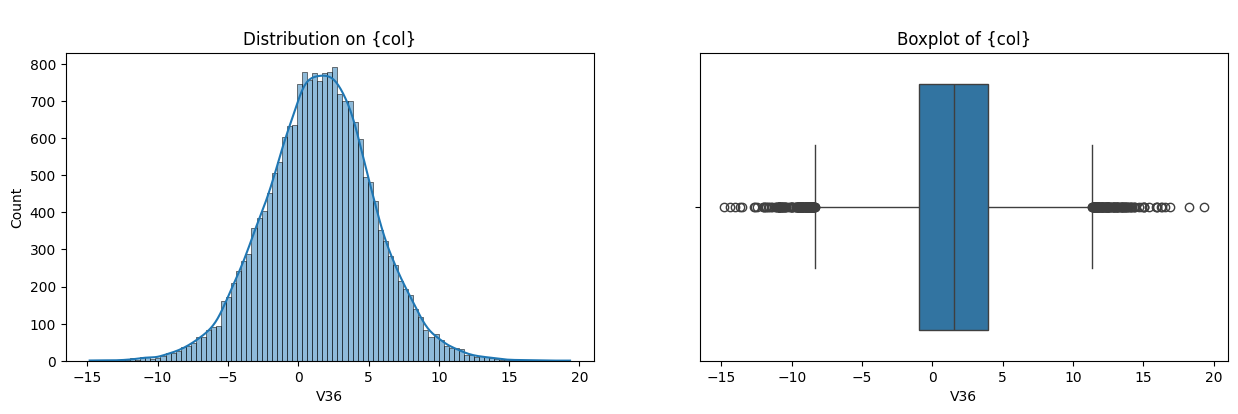

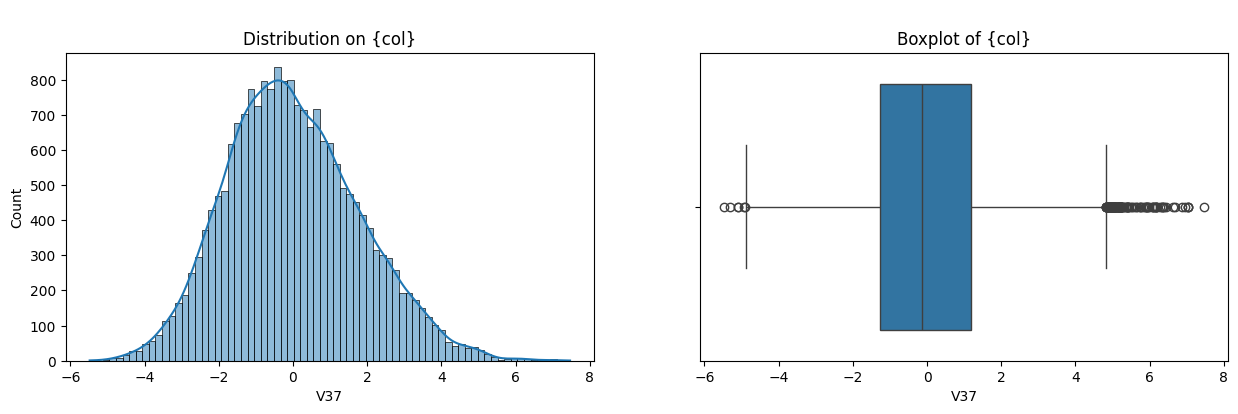

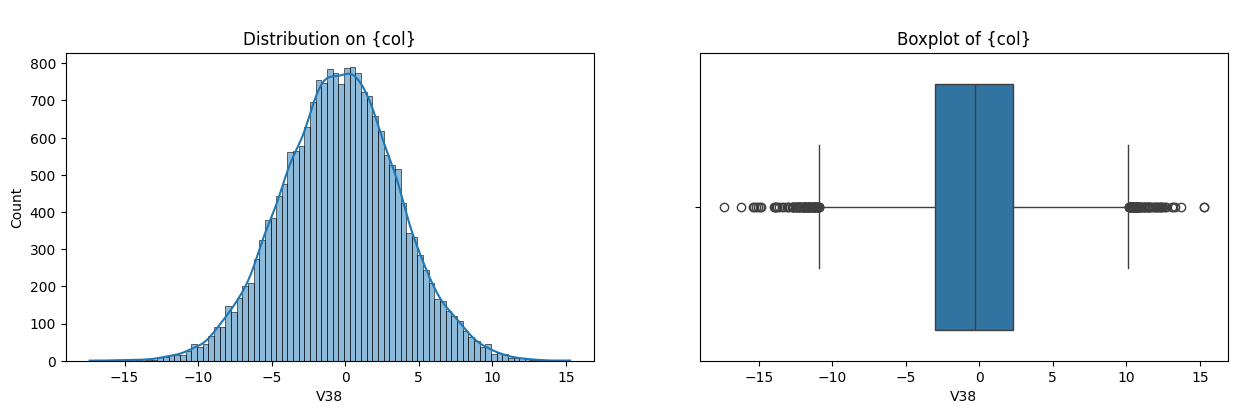

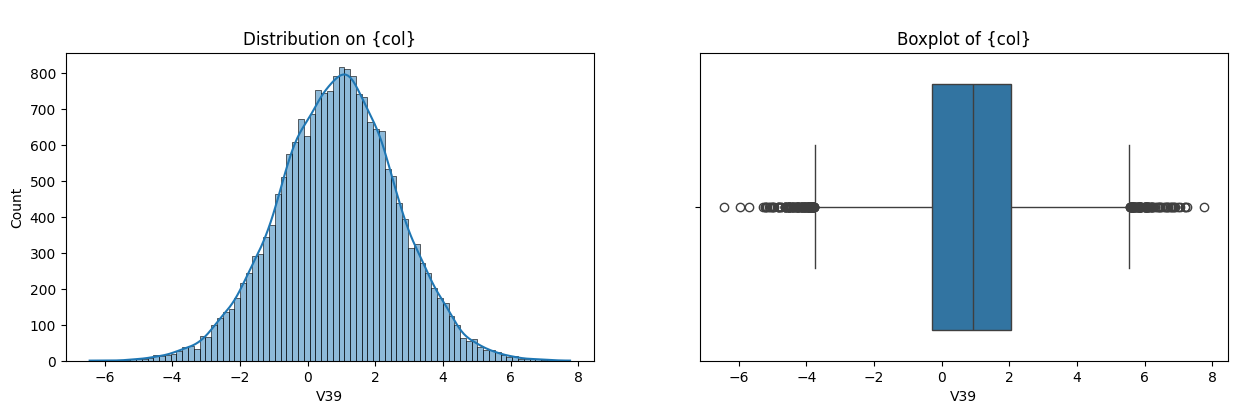

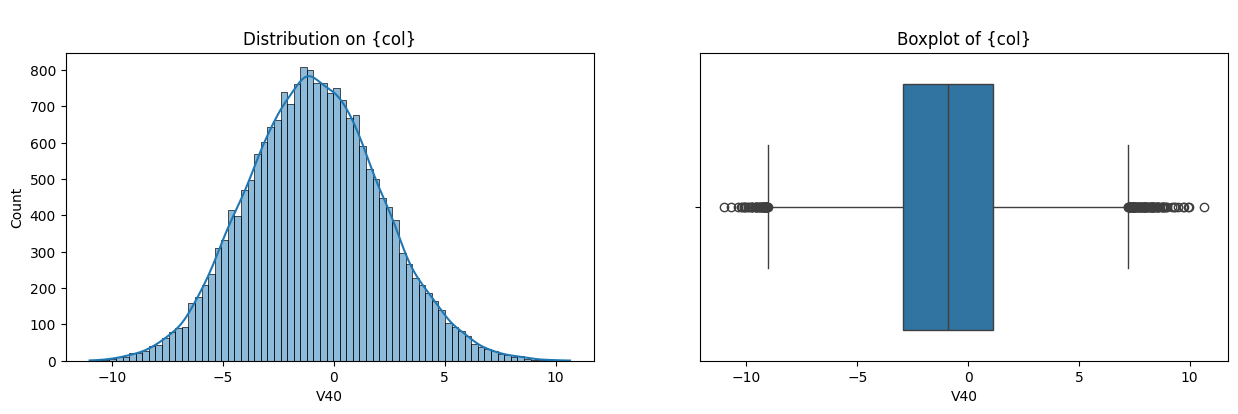

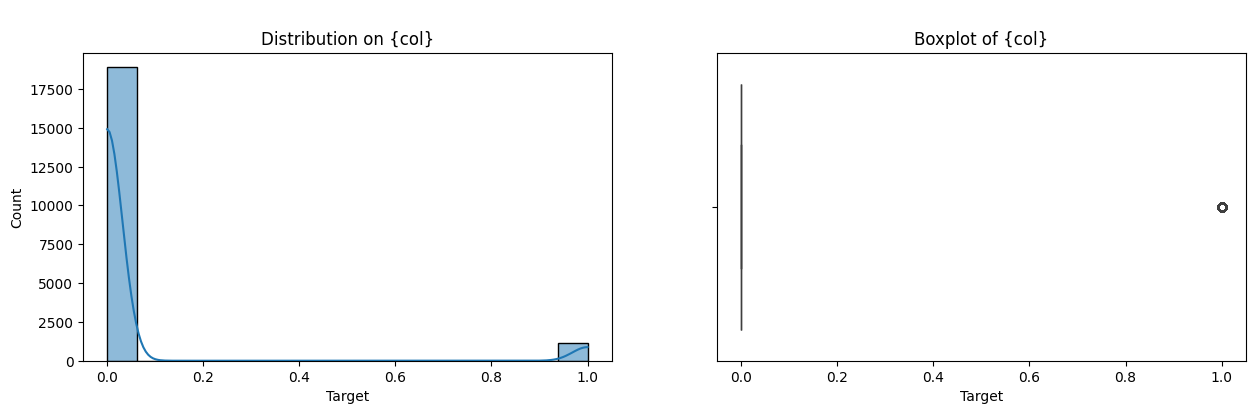

In [13]:
# Histograms and Boxplots (Univarite Analysis)
for col in df_train.columns:
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(data=df_train, x=col, kde=True)
    plt.title('Distribution on {col}')
    plt.subplot(1,2,2)
    sns.boxplot(data=df_train, x=col)
    plt.title("\nBoxplot of {col}")
    plt.show()

<Axes: xlabel='Target', ylabel='count'>

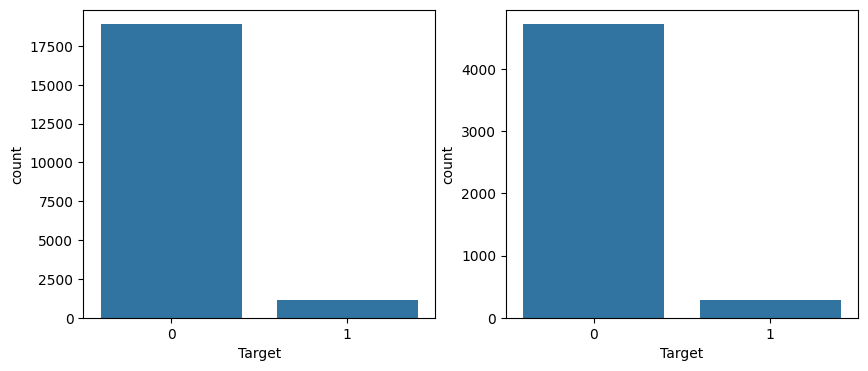

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(data=df_train, x='Target')
plt.subplot(122)
sns.countplot(data=df_test, x='Target')

In [15]:
print(df_train['Target'].value_counts(True))
print(df_test['Target'].value_counts(True))

Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64
Target
0    0.9436
1    0.0564
Name: proportion, dtype: float64


### **INSIGHTS:**
- Independant cols in Data have many outliers
- Target column is **highly imbalanced**


## **Splitting training data into train and validation sets**

In [16]:
X_train, X_val, y_train, y_val=train_test_split(
    df_train.drop('Target', axis=1), 
    df_train['Target'],
    test_size=0.2,
    random_state=42)

In [17]:
X_train.shape, X_val.shape

((16000, 40), (4000, 40))

## **Data Preprocessing:**

#### **Handling missing vals**

In [18]:
# Checking for percentages of missing vals 
print(df_train['V1'].isna().mean()*100)
print(df_train['V2'].isna().mean()*100)
print(df_test['V1'].isna().mean()*100)
print(df_test['V2'].isna().mean()*100)

0.09
0.09
0.1
0.12


**Both Training and Testing Data has <5% missing vals, so we can simply drop the rows with missing vals but Let's use Median (due  to outliers) for imputing as those rows may be informative.**

In [30]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [31]:
trf1 = ColumnTransformer(transformers = [
    ('impute_and_scale', Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ]), num_cols)
], remainder='passthrough')

X_train_transformed = trf1.fit_transform(X_train)
X_val_transformed = trf1.transform(X_val)
X_test_transformed = trf1.transform(df_test)

In [32]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning
- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a scorer in cross-validation and hyperparameter tuning.

In [35]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

In [38]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_transformed, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_transformed, y_train)
    scores = recall_score(y_val, model.predict(X_val_transformed))
    print("{}: {}".format(name, scores))



Cross-Validation performance on training dataset:

dtree: 0.7333333333333333
Bagging: 0.7152542372881356
Random forest: 0.7254237288135593
GBM: 0.7141242937853107
Adaboost: 0.5005649717514125
Xgboost: 0.7988700564971751

Validation Performance:

dtree: 0.7244444444444444
Bagging: 0.7377777777777778
Random forest: 0.7022222222222222
GBM: 0.7155555555555555
Adaboost: 0.5422222222222223
Xgboost: 0.7955555555555556


### Summary:
- xgboost performed best followed by gbm, dtree, and randomforest

# **HANDLING IMBALANCED DATA**

### **OVERSAMPLING**

In [40]:
print(f"Before OverSampling, counts of label '1': {sum(y_train == 1)}")
print(f"Before OverSampling, counts of label '0': {sum(y_train == 0)}\n")

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train_transformed, y_train)

print(f"After OverSampling, counts of label '1': {sum(y_train_over == 1)}")
print(f"After OverSampling, counts of label '0': {sum(y_train_over == 0)}\n")

print(f"After OverSampling, the shape of train_X: {X_train_over.shape}")
print(f"After OverSampling, the shape of train_y: {y_train_over.shape}\n")


Before OverSampling, counts of label '1': 885
Before OverSampling, counts of label '0': 15115

After OverSampling, counts of label '1': 15115
After OverSampling, counts of label '0': 15115

After OverSampling, the shape of train_X: (30230, 40)
After OverSampling, the shape of train_y: (30230,)



### **UNDERSAMPLING**

In [41]:
print(f"Before UnderSampling, counts of label '1': {sum(y_train == 1)}")
print(f"Before UnderSampling, counts of label '0': {sum(y_train == 0)}\n")

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train_transformed, y_train)

print(f"After UnderSampling, counts of label '1': {sum(y_train_un == 1)}")
print(f"After UnderSampling, counts of label '0': {sum(y_train_un == 0)}\n")

print(f"After UnderSampling, the shape of train_X: {X_train_un.shape}")
print(f"After UnderSampling, the shape of train_y: {y_train_un.shape}\n")


Before UnderSampling, counts of label '1': 885
Before UnderSampling, counts of label '0': 15115

After UnderSampling, counts of label '1': 885
After UnderSampling, counts of label '0': 885

After UnderSampling, the shape of train_X: (1770, 40)
After UnderSampling, the shape of train_y: (1770,)



# **HYPERPARAMETER TUNING**

## **DECISION TREES**

In [42]:
# on original imbalanced data
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': np.arange(2, 6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_transformed, y_train)

# Display best parameters and score
print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")



Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': np.int64(5)} with CV score = 0.5119


In [43]:
# Creating DecisionTreeClassifier with best parameters
dtree = DecisionTreeClassifier(
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=15,
    max_depth=5
)

dtree.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [46]:
# Calculating different metrics on train set
dtree_train_perf = model_performance_classification_sklearn(dtree, X_train_transformed, y_train)
dtree_train_perf


,Accuracy,Recall,Precision,F1
0,0.973313,0.611299,0.866987,0.717031


In [47]:
# Calculating different metrics on validation set
dtree_val_perf = model_performance_classification_sklearn(dtree, X_val_transformed, y_val)
print("Validation performance:")
dtree_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9695,0.617778,0.794286,0.695


In [48]:
# on OVERSAMPLED data
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': np.arange(2, 6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)


randomized_cv.fit(X_train_over, y_train_over)

print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")



Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': np.int64(3)} with CV score = 0.9046


In [49]:
# Create DecisionTreeClassifier with best parameters
dtree_over = DecisionTreeClassifier(
    min_samples_leaf=7,
    min_impurity_decrease=0.001,
    max_leaf_nodes=15,
    max_depth=3
)

dtree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7)

In [50]:
# Calculating different metrics on train set
dtree_over_train_perf = model_performance_classification_sklearn(dtree_over, X_train_over, y_train_over)
dtree_over_train_perf


,Accuracy,Recall,Precision,F1
0,0.829639,0.907112,0.785416,0.841889


In [51]:
# Calculating different metrics on validation set
dtree_over_val_perf = model_performance_classification_sklearn(dtree_over, X_val_transformed, y_val)
print("Validation performance:")
dtree_over_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.76,0.88,0.175066,0.292035


In [52]:
# on UNDERSAMPLED data
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': np.arange(2, 6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

# Display best parameters and score
print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")



Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': np.int64(5)} with CV score = 0.8147


In [53]:
# Create DecisionTreeClassifier with best parameters
dtree_under = DecisionTreeClassifier(
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=15,
    max_depth=5
)

dtree_under.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [54]:
# Calculating different metrics on train set
dtree_under_train_perf = model_performance_classification_sklearn(dtree_under, X_train_un, y_train_un)
dtree_under_train_perf


,Accuracy,Recall,Precision,F1
0,0.90339,0.861017,0.940741,0.899115


In [55]:
# Calculating different metrics on validation set
dtree_under_val_perf = model_performance_classification_sklearn(dtree_under, X_val_transformed, y_val)
print("Validation performance:")
dtree_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.91575,0.848889,0.38664,0.531293


## **RANDOM FOREST**

In [56]:
# on original imbalanced data
Model = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': np.arange(3, 8),
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2'],
}

randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

randomized_cv.fit(X_train_transformed, y_train)

print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': np.int64(7)} with CV score = 0.5514


In [57]:
# Create RandomForestClassifier with best parameters
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=7,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=1
)
rf.fit(X_train_transformed, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300, random_state=1)

In [58]:
# Train performance
rf_train_perf = model_performance_classification_sklearn(rf, X_train_transformed, y_train)
rf_train_perf

,Accuracy,Recall,Precision,F1
0,0.979187,0.624859,0.998195,0.768589


In [59]:
# Validation performance
rf_val_perf = model_performance_classification_sklearn(rf, X_val_transformed, y_val)
print("Validation performance:")
rf_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.97225,0.511111,0.991379,0.674487


In [60]:
# on OVERSAMPLED data
Model = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': np.arange(3, 8),
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2'],
}

randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

randomized_cv.fit(X_train_over, y_train_over)

print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': np.int64(7)} with CV score = 0.9119


In [ ]:
# Create RandomForestClassifier with best parameters
rf_over = RandomForestClassifier(
    n_estimators=300,
    max_depth=7,
    min_samples_leaf=1,
    max_features='sqrt',
)
rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=7, n_estimators=300, random_state=1)

In [63]:
# Train performance
rf_train_over_perf = model_performance_classification_sklearn(rf_over, X_train_over, y_train_over)
rf_train_over_perf

,Accuracy,Recall,Precision,F1
0,0.948958,0.915581,0.981072,0.947196


In [64]:
# Validation performance
rf_val_over_perf = model_performance_classification_sklearn(rf_over, X_val_transformed, y_val)
print("Validation performance:")
rf_val_over_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.97175,0.884444,0.695804,0.778865


In [65]:
# on UNDERSAMPLED data
Model = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': np.arange(3, 8),
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2'],
}

randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

randomized_cv.fit(X_train_un, y_train_un)

print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': np.int64(7)} with CV score = 0.8802


In [66]:
# Create RandomForestClassifier with best parameters
rf_under = RandomForestClassifier(
    n_estimators=300,
    max_depth=7,
    min_samples_leaf=1,
    max_features='sqrt',
)
rf_under.fit(X_train_un, y_train_un)

RandomForestClassifier(max_depth=7, n_estimators=300)

In [67]:
# Train performance
rf_train_under_perf = model_performance_classification_sklearn(rf_under, X_train_un, y_train_un)
rf_train_under_perf

,Accuracy,Recall,Precision,F1
0,0.954237,0.910734,0.997525,0.952156


In [68]:
# Validation performance
rf_val_under_perf = model_performance_classification_sklearn(rf_under, X_val_transformed, y_val)
print("Validation performance:")
rf_val_under_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9475,0.906667,0.519084,0.660194


## **GRADIENT BOOSTING**

In [69]:
# on original imbalanced data
Model = GradientBoostingClassifier(random_state=1)

param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7] 
}
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

randomized_cv.fit(X_train_transformed, y_train)

print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")


Best parameters are {'subsample': 0.7, 'n_estimators': np.int64(125), 'max_features': 0.5, 'learning_rate': 0.2} with CV score = 0.7627


In [70]:
# Create GradientBoostingClassifier with best parameters
gb = GradientBoostingClassifier(
    n_estimators=125,
    learning_rate=0.2,
    max_features=0.5,
    subsample=0.7
)
gb.fit(X_train_transformed, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.7)

In [71]:
# Train performance
gb_train_perf = model_performance_classification_sklearn(gb, X_train_transformed, y_train)
gb_train_perf

,Accuracy,Recall,Precision,F1
0,0.994563,0.912994,0.987775,0.948914


In [72]:
# Validation performance
gb_val_perf = model_performance_classification_sklearn(gb, X_val_transformed, y_val)
print("Validation performance:")
gb_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9805,0.742222,0.893048,0.81068


In [73]:
# on OVERSAMPLED data
Model = GradientBoostingClassifier(random_state=1)

param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7] 
}
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)


randomized_cv.fit(X_train_over, y_train_over)

print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")

Best parameters are {'subsample': 0.7, 'n_estimators': np.int64(125), 'max_features': 0.5, 'learning_rate': 1} with CV score = 0.9664


In [74]:
# Create GradientBoostingClassifier with best parameters
gb_over = GradientBoostingClassifier(
    n_estimators=125,
    learning_rate=1,
    max_features=0.5,
    subsample=0.7
)
gb_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           subsample=0.7)

In [75]:
# Train performance
gb_train_over_perf = model_performance_classification_sklearn(gb_over, X_train_over, y_train_over)
gb_train_over_perf

,Accuracy,Recall,Precision,F1
0,0.988257,0.986768,0.989715,0.988239


In [76]:
# Validation performance
gb_val_over_perf = model_performance_classification_sklearn(gb_over, X_val_transformed, y_val)
print("Validation performance:")
gb_val_over_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9625,0.862222,0.619808,0.72119


In [77]:
# on UNDERSAMPLED data
Model = GradientBoostingClassifier(random_state=1)

param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7] 
}
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

randomized_cv.fit(X_train_un, y_train_un)

print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")


Best parameters are {'subsample': 0.5, 'n_estimators': np.int64(125), 'max_features': 0.5, 'learning_rate': 0.2} with CV score = 0.8927


In [79]:
# Create GradientBoostingClassifier with best parameters
gb_under = GradientBoostingClassifier(
    n_estimators=125,
    learning_rate=0.2,
    max_features=0.5,
    subsample=0.5
)
gb_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.5)

In [80]:
# Train performance
gb_train_under_perf = model_performance_classification_sklearn(gb_under, X_train_un, y_train_un)
gb_train_under_perf

,Accuracy,Recall,Precision,F1
0,0.991525,0.984181,0.998853,0.991463


In [81]:
# Validation performance
gb_val_under_perf = model_performance_classification_sklearn(gb_under, X_val_transformed, y_val)
print("Validation performance:")
gb_val_under_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.92825,0.92,0.434874,0.590585


## **ADA BOOSTING**

In [87]:
# on original imbalanced data
Model = AdaBoostClassifier(random_state=1)


param_grid = { "n_estimators": [100, 150, 200],
              "learning_rate": [0.2, 0.05],
            #   "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1), ] }
}
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

randomized_cv.fit(X_train_transformed, y_train)

print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")


Best parameters are {'n_estimators': 200, 'learning_rate': 0.2} with CV score = 0.3322


In [88]:
# Create AdaBoostClassifier with best parameters
ada = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.2,
    random_state=1
)
ada.fit(X_train_transformed, y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=200, random_state=1)

In [91]:
# Train performance
ada_train_perf = model_performance_classification_sklearn(ada, X_train_transformed, y_train)
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.96125,0.333333,0.907692,0.487603


In [92]:
# Validation performance
ada_val_perf = model_performance_classification_sklearn(ada, X_val_transformed, y_val)
print("Validation performance:")
ada_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.95775,0.293333,0.868421,0.438538


In [94]:
# on OVERSAMPLED data
Model = AdaBoostClassifier(random_state=1)


param_grid = { "n_estimators": [100, 150, 200],
              "learning_rate": [0.2, 0.05]
}

randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

randomized_cv.fit(X_train_over, y_train_over)

print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")


Best parameters are {'n_estimators': 200, 'learning_rate': 0.2} with CV score = 0.8655


In [95]:
# Create AdaBoostClassifier with best parameters
ada_over = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.2,
    random_state=1
)
ada_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(learning_rate=0.2, n_estimators=200, random_state=1)

In [96]:
# Train performance
ada_train_over_perf = model_performance_classification_sklearn(ada_over, X_train_over, y_train_over)
ada_train_over_perf

,Accuracy,Recall,Precision,F1
0,0.884089,0.866226,0.898319,0.88198


In [97]:
# Validation performance
ada_val_over_perf = model_performance_classification_sklearn(ada_over, X_val_transformed, y_val)
print("Validation performance:")
ada_val_over_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.8935,0.866667,0.329949,0.477941


In [98]:
# on UNDERSAMPLED data
Model = AdaBoostClassifier(random_state=1)


param_grid = { "n_estimators": [100, 150, 200],
              "learning_rate": [0.2, 0.05]
}

randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

randomized_cv.fit(X_train_un, y_train_un)

print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")


Best parameters are {'n_estimators': 200, 'learning_rate': 0.2} with CV score = 0.8418


In [99]:
# Create AdaBoostClassifier with best parameters
ada_under = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.2,
    random_state=1
)
ada_under.fit(X_train_un, y_train_un)

AdaBoostClassifier(learning_rate=0.2, n_estimators=200, random_state=1)

In [100]:
# Train performance
ada_train_under_perf = model_performance_classification_sklearn(ada_under, X_train_un, y_train_un)
ada_train_under_perf

# Validation performance
ada_val_under_perf = model_performance_classification_sklearn(ada_under, X_val_transformed, y_val)
print("Validation performance:")
ada_val_under_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.892,0.857778,0.325464,0.471883


## **XGBOOST**

In [101]:
# on original imbalanced data
Model = XGBClassifier(random_state=1)

# Parameter grid for RandomizedSearchCV
param_grid={ 'n_estimators': [150, 200, 250],
            'scale_pos_weight': [5,10],
            'learning_rate': [0.1,0.2],
            'gamma': [0,3,5],
            'subsample': [0.8,0.9] }

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_transformed, y_train)

# Display best parameters and score
print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")



Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score = 0.8475


In [ ]:
# Create XGBClassifier with best parameters
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    scale_pos_weight= 10,
    subsample=0.8,
    gamma=5
)
xgb.fit(X_train_transformed, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [103]:
# Train performance
xgb_train_perf = model_performance_classification_sklearn(xgb, X_train_transformed, y_train)
xgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.9985,1.0,0.973597,0.986622


In [104]:
# Validation performance
xgb_val_perf = model_performance_classification_sklearn(xgb, X_val_transformed, y_val)
print("Validation performance:")
xgb_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.875556,0.907834,0.891403


In [105]:
# on OVERSAMPLED data
Model = XGBClassifier(random_state=1)

# Parameter grid for RandomizedSearchCV
param_grid={ 'n_estimators': [150, 200, 250],
            'scale_pos_weight': [5,10],
            'learning_rate': [0.1,0.2],
            'gamma': [0,3,5],
            'subsample': [0.8,0.9] }

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

# Display best parameters and score
print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")



Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 0} with CV score = 0.9966


In [106]:
# Create XGBClassifier with best parameters
xgb_over = XGBClassifier(
    n_estimators=250,
    learning_rate=0.1,
    scale_pos_weight= 10,
    subsample=0.8,
    gamma=0
)
xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

In [107]:
# Train performance
xgb_train_over_perf = model_performance_classification_sklearn(xgb_over, X_train_over, y_train_over)
xgb_train_over_perf

,Accuracy,Recall,Precision,F1
0,0.999173,1.0,0.998349,0.999174


In [108]:
# Validation performance
xgb_val_over_perf = model_performance_classification_sklearn(xgb_over, X_val_transformed, y_val)
print("Validation performance:")
xgb_val_over_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.98275,0.897778,0.814516,0.854123


In [109]:
# on UNDERSAMPLED data
Model = XGBClassifier(random_state=1)

# Parameter grid for RandomizedSearchCV
param_grid={ 'n_estimators': [150, 200, 250],
            'scale_pos_weight': [5,10],
            'learning_rate': [0.1,0.2],
            'gamma': [0,3,5],
            'subsample': [0.8,0.9] }

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

# Display best parameters and score
print(f"Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_:.4f}")



Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score = 0.9209


In [110]:
# Create XGBClassifier with best parameters
xgb_under = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    scale_pos_weight= 10,
    subsample=0.8,
    gamma=5
)
xgb_under.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [111]:
# Train performance
xgb_train_under_perf = model_performance_classification_sklearn(xgb_under, X_train_un, y_train_un)
xgb_train_under_perf

,Accuracy,Recall,Precision,F1
0,0.976836,1.0,0.955724,0.977361


In [112]:
# Validation performance
xgb_val_under_perf = model_performance_classification_sklearn(xgb_under, X_val_transformed, y_val)
print("Validation performance:")
xgb_val_under_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.83825,0.928889,0.24881,0.392488


# **MODEL PERFORMANCE COMPARISON**

In [113]:
models_train_comp_df = pd.concat(
    [
        dtree_over_train_perf.T,
        rf_train_over_perf.T,
        gb_train_over_perf.T,
        ada_train_over_perf.T,
        xgb_train_over_perf.T,

        dtree_under_train_perf.T,
        rf_train_under_perf.T,
        gb_train_under_perf.T,
        ada_train_under_perf.T,
        xgb_train_under_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
       'dtree_oversampled_train',
       'rf_oversampled_train',
       'gb_oversampled_train',
       'ada_oversampled_train',
       'xgb_oversampled_train',
       
       'dtree_undersampled_train',
       'rf_undersampled_train',
       'gb_undersampled_train',
       'ada_undersampled_train',
       'xgb_undersampled_train',
       
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,dtree_oversampled_train,rf_oversampled_train,gb_oversampled_train,ada_oversampled_train,xgb_oversampled_train,dtree_undersampled_train,rf_undersampled_train,gb_undersampled_train,ada_undersampled_train,xgb_undersampled_train
Accuracy,0.829639,0.948958,0.988257,0.884089,0.999173,0.903390,0.954237,0.991525,0.888136,0.976836
Recall,0.907112,0.915581,0.986768,0.866226,1.000000,0.861017,0.910734,0.984181,0.856497,1.000000
Precision,0.785416,0.981072,0.989715,0.898319,0.998349,0.940741,0.997525,0.998853,0.914355,0.955724
F1,0.841889,0.947196,0.988239,0.881980,0.999174,0.899115,0.952156,0.991463,0.884481,0.977361


In [114]:
models_val_comp_df = pd.concat(
    [
        dtree_over_val_perf.T,
        rf_val_over_perf.T,
        gb_val_over_perf.T,
        ada_val_over_perf.T,
        xgb_val_over_perf.T,

        dtree_under_val_perf.T,
        rf_val_under_perf.T,
        gb_val_under_perf.T,
        ada_val_under_perf.T,
        xgb_val_under_perf.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
       'dtree_oversampled_val',
       'rf_oversampled_val',
       'gb_oversampled_val',
       'ada_oversampled_val',
       'xgb_oversampled_val',
       
       'dtree_undersampled_val',
       'rf_undersampled_val',
       'gb_undersampled_val',
       'ada_undersampled_val',
       'xgb_undersampled_val',
       
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,dtree_oversampled_val,rf_oversampled_val,gb_oversampled_val,ada_oversampled_val,xgb_oversampled_val,dtree_undersampled_val,rf_undersampled_val,gb_undersampled_val,ada_undersampled_val,xgb_undersampled_val
Accuracy,0.760000,0.971750,0.962500,0.893500,0.982750,0.915750,0.947500,0.928250,0.892000,0.838250
Recall,0.880000,0.884444,0.862222,0.866667,0.897778,0.848889,0.906667,0.920000,0.857778,0.928889
Precision,0.175066,0.695804,0.619808,0.329949,0.814516,0.386640,0.519084,0.434874,0.325464,0.248810
F1,0.292035,0.778865,0.721190,0.477941,0.854123,0.531293,0.660194,0.590585,0.471883,0.392488


## **XGBoost trained on oversampled data is best-performing and most balanced model.**

In [ ]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("preprocessor", trf1),
        (
            "XGB",
            XGBClassifier(
            n_estimators=250,
            learning_rate=0.1,
            scale_pos_weight= 10,
            subsample=0.8,
            gamma=0,
            eval_metric="logloss"
           ),
        ),
    ]
)

model.fit(X_train_over, y_train_over)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_and_scale',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27'...
                               feature_types=None, feature_weights=None,
                               gamma=0, grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=250, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [126]:
X_test= df_test.drop('Target', axis=1)
y_test= df_test['Target']

In [129]:
y_pred = model.predict(X_test)


In [131]:
model_performance_classification_sklearn(model, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.9796,0.659574,0.96875,0.78481


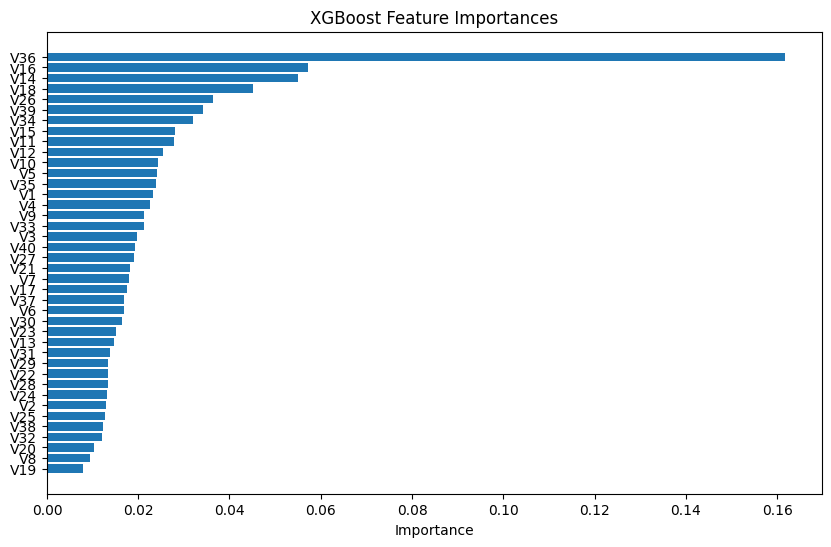

In [134]:
# Extract the trained XGB model from the pipeline
xgb_model = model.named_steps["XGB"]

# Get feature names after preprocessing
feature_names = list(X_train.columns)  # original features (before scaling)

# Create a DataFrame of feature importance
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"], feat_imp["Importance"])
plt.gca().invert_yaxis()  # highest importance on top
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"], feat_imp["Importance"])
plt.gca().invert_yaxis()  # highest importance on top
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.show()